# Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

# A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

# Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [2]:
Company = pd.read_excel('Company_Data2015-1.xlsx')

#Glimpse of Data
Company.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


# Fixing messy column names (containing spaces) for ease of use

In [3]:
Company.columns = Company.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

# Converting all objects to categorical codes

In [4]:
Company['Co_Code'] = (Company['Co_Code']).apply(str) 

In [5]:
for feature in Company.columns: 
    if Company[feature].dtype == 'object':
        Company[feature] = pd.Categorical(Company[feature]).codes 

# Checking top 5 rows again

In [6]:
Company.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,459,1226,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,704,3214,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,333,21,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,963,1001,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,884,452,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


# Now, let us check the number of rows (observations) and the number of columns (variables)

In [7]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


# Checking datatype of all columns

In [8]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int16  
 1   Co_Name                              3586 non-null   int16  
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_to_Liabilities_  

# Now, let us check the basic measures of descriptive statistics for the continuous variables


In [9]:

Company.describe()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.00000,3586.00000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
mean,1792.50000,1792.50000,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,...,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,1035.33336,1035.33336,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,...,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,0.00000,0.00000,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,896.25000,896.25000,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,1792.50000,1792.50000,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,2688.75000,2688.75000,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,...,18.990000,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,96.000000,1.160000,4.910000
max,3585.00000,3585.00000,111729.100000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


In [10]:
pd.options.display.float_format = '{:.2f}'.format   

Company.describe()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,...,3585.00,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00
mean,1792.50,1792.50,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,...,-51.16,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88
std,1035.33,1035.33,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,...,1795.13,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82
min,0.00,0.00,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,...,-78870.45,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00
25%,896.25,896.25,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,...,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27
50%,1792.50,1792.50,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,...,8.07,5.23,4.69,3.89,1.59,49.00,39.00,35.00,0.48,1.53
75%,2688.75,2688.75,123.80,19.52,117.30,226.61,72.35,131.90,61.17,135.28,...,18.99,14.29,14.11,11.39,7.41,106.00,89.00,96.00,1.16,4.91
max,3585.00,3585.00,111729.10,42263.46,81657.35,714001.25,652823.81,128477.59,223257.56,721166.00,...,19233.33,19195.70,15640.00,15640.00,15266.67,514721.00,2034145.00,996.00,17.63,43404.00


# Creating a binary target variable using 'Networth_Next_Year'


In [11]:
Company['default']=np.where(Company['Networth_Next_Year']<=0,1,0)

# Checking top 10 rows

In [12]:
Company[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,1,-8021.60
1,1,-3986.19
2,1,-3192.58
3,1,-3054.51
4,1,-2967.36
5,1,-2519.40
6,1,-2125.05
7,1,-2100.56
8,1,-1695.75
9,1,-1677.18


# What does variable 'default' look like

In [13]:
Company['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

# Checking proportion of default

In [14]:
Company['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

# Lets check for missing values in the dataset

In [15]:
# Checking for Missing values

In [16]:
Company.isnull().sum()

Co_Code                              0
Co_Name                              0
Networth_Next_Year                   0
Equity_Paid_Up                       0
Networth                             0
                                  ... 
Creditors_Velocity_Days              0
Inventory_Velocity_Days            103
Value_of_Output_to_Total_Assets      0
Value_of_Output_to_Gross_Block       0
default                              0
Length: 68, dtype: int64

In [17]:
Company.size

243848

In [18]:
Company.isnull().sum().sum()

118

In [19]:
Company_X = Company.drop('default', axis = 1)
Company_Y = Company['default']

In [20]:
Company_X

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,459,1226,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,704,3214,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,333,21,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,963,1001,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,884,452,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,2440,1161,72677.77,501.30,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,...,0.00,0.00,0.00,0.00,0.00,0,0,nan,0.60,7.76
3582,2456,3428,79162.19,296.50,34057.87,71906.06,37643.79,29848.44,2503.86,11554.45,...,39.92,32.17,29.81,30.52,22.77,13,53,77.00,0.29,1.00
3583,58,1260,88134.31,2427.95,67969.97,140686.75,55245.01,121643.45,6376.84,89609.82,...,8.09,6.69,7.31,5.69,4.29,7,30,48.00,1.42,3.24
3584,57,2035,91293.70,8245.46,81657.35,173099.14,85995.34,128477.59,11449.79,42353.59,...,28.12,20.55,23.39,19.55,11.99,32,69,42.00,0.36,0.68


# Let's check the number of outliers per column

In [21]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [22]:
((Company_X > UL) | (Company_X < LL)).sum()

Co_Code                              0
Co_Name                              0
Networth_Next_Year                 676
Equity_Paid_Up                     448
Networth                           650
                                  ... 
Debtors_Velocity_Days              398
Creditors_Velocity_Days            391
Inventory_Velocity_Days            262
Value_of_Output_to_Total_Assets    150
Value_of_Output_to_Gross_Block     481
Length: 67, dtype: int64

In [23]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [24]:
Company_X.isnull().sum()

Co_Code                              0
Co_Name                              0
Networth_Next_Year                 676
Equity_Paid_Up                     448
Networth                           650
                                  ... 
Debtors_Velocity_Days              398
Creditors_Velocity_Days            391
Inventory_Velocity_Days            365
Value_of_Output_to_Total_Assets    150
Value_of_Output_to_Gross_Block     481
Length: 67, dtype: int64

In [25]:
Company_X.isnull().sum().sum()

42149

In [26]:
Company_X.shape

(3586, 67)

In [27]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

# Let's visually inspect the missing values in our data

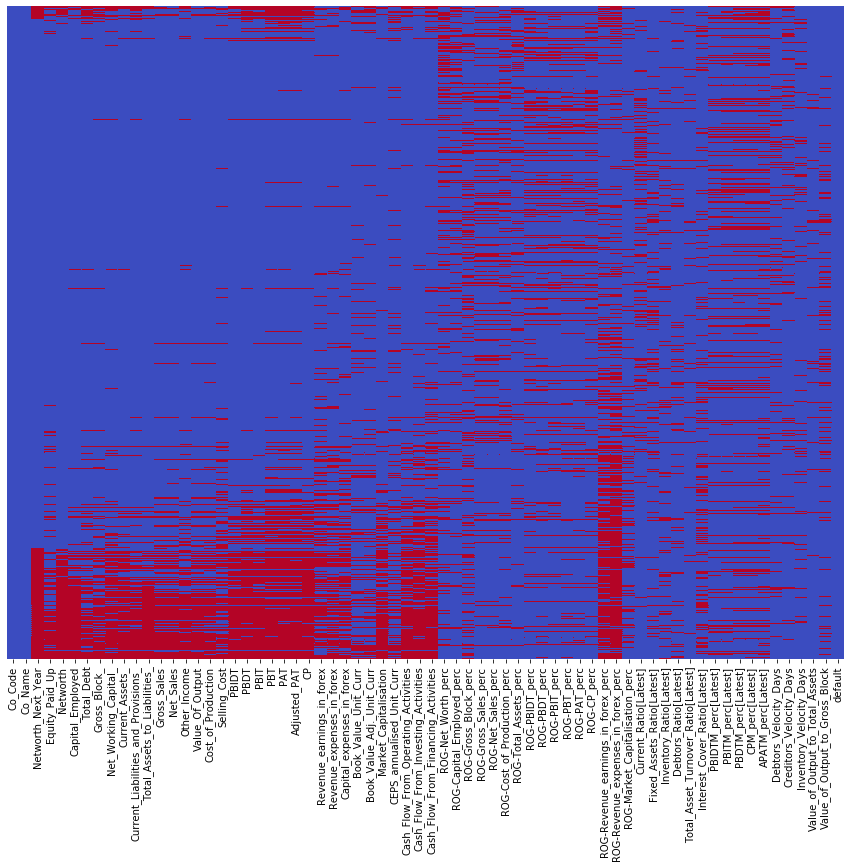

In [28]:
plt.figure(figsize = (15,12))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

# We should inspect total missing values by each row.

In [29]:
Company_sub1.isnull().sum(axis = 1)

0       20
1       35
2       44
3       37
4       36
        ..
3581    31
3582    37
3583    35
3584    31
3585    37
Length: 3586, dtype: int64

In [30]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]

In [31]:
Company_sub1_temp.shape

(1201, 68)

In [32]:
Company_sub1_temp['default'].value_counts()

0    1083
1     118
Name: default, dtype: int64

In [33]:
Company_sub1['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [34]:
95/388

0.24484536082474226

# Dropping columns with more than 30% missing values

In [35]:
from pandas import DataFrame
from IPython.display import HTML
pd.options.display.max_rows = 4000

In [36]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

ROG-Revenue_expenses_in_forex_perc    0.45
ROG-Revenue_earnings_in_forex_perc    0.37
Cash_Flow_From_Financing_Activities   0.28
PAT                                   0.27
Adjusted_PAT                          0.27
PBT                                   0.26
APATM_perc[Latest]                    0.26
Cash_Flow_From_Investing_Activities   0.24
ROG-Gross_Block_perc                  0.23
CP                                    0.23
PBDT                                  0.23
Cash_Flow_From_Operating_Activities   0.22
ROG-Net_Worth_perc                    0.21
Revenue_earnings_in_forex             0.21
Interest_Cover_Ratio[Latest]          0.20
CPM_perc[Latest]                      0.20
PBIT                                  0.20
PBITM_perc[Latest]                    0.20
PBDTM_perc[Latest]                    0.19
Capital_expenses_in_forex             0.19
Revenue_expenses_in_forex             0.19
Networth_Next_Year                    0.19
ROG-Cost_of_Production_perc           0.19
ROG-Gross_S

## Dropping columns with more than 30% missing values

In [37]:
Company_sub2 = Company_sub1.drop(['ROG-Revenue_expenses_in_forex_perc','ROG-Revenue_earnings_in_forex_perc',], axis = 1)

In [38]:
Company_sub2.shape

(3586, 66)

# Segregate the predictors and response

In [39]:
predictors = Company_sub2.drop('default', axis = 1)
response = Company_sub2['default']

# Scale the predictors

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [41]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

**Standardization prevents variables with larger scales from dominating how clusters are defined. It allows all variables to be considered by the algorithm with equal importance.**

# Imputing the remaining missing values

In [42]:
from sklearn.impute import KNNImputer

In [43]:
imputer = KNNImputer(n_neighbors=10)

In [44]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub3), columns = Company_sub3.columns)

In [45]:
Company_imputed.isnull().sum()

Co_Code                                0
Co_Name                                0
Networth_Next_Year                     0
Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block_                           0
Net_Working_Capital_                   0
Current_Assets_                        0
Current_Liabilities_and_Provisions_    0
Total_Assets_to_Liabilities_           0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Production                     0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP              

## Inspect possible correlations between independent variables

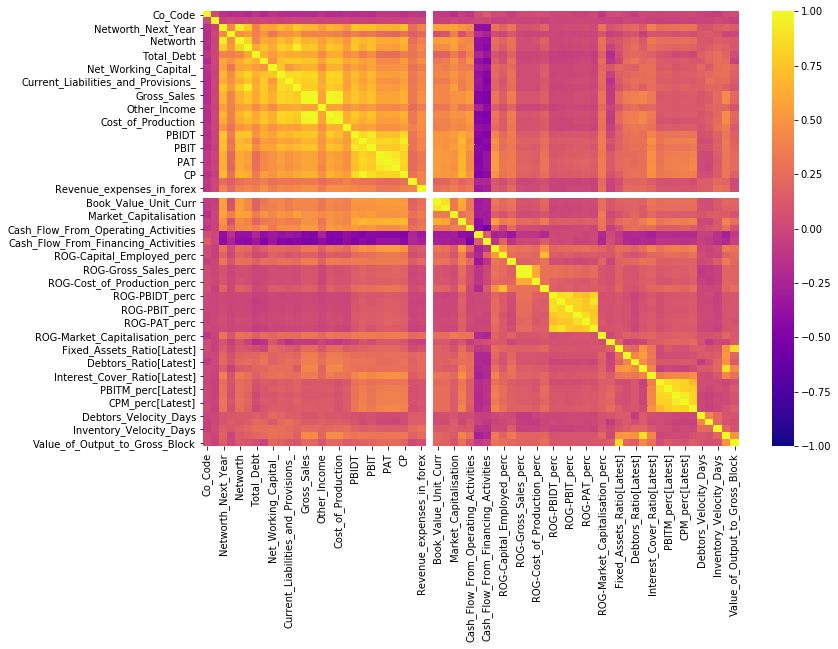

In [46]:
plt.figure(figsize = (12,8))
cor_matrix = Company_imputed.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [47]:
predictors = Company_imputed.drop('default', axis = 1)
response = Company_imputed['default']

In [48]:
from sklearn.model_selection import train_test_split
y = Company_imputed['default']
X_train,X_test,y_train,y_test=train_test_split(predictors,response, test_size=0.33,random_state=42)
Default_train = pd.concat([X_train,y_train], axis=1)
Default_test = pd.concat([X_test,y_test], axis=1)

# For modeling we will use Logistic Regression with recursive feature elimination

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [50]:
LogR = LogisticRegression()

In [51]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [52]:
selector = selector.fit(X_train, y_train)

In [53]:
selector.n_features_

15

In [54]:
selector.ranking_

array([ 8, 31,  1, 45, 15,  1, 18,  1, 17,  1,  1,  1,  9, 27,  4,  1,  1,
       35,  1,  1,  1, 36, 37, 41, 39, 12, 10, 51,  1,  1, 26, 49, 16, 30,
       19,  2,  3, 46, 20, 21, 22, 11, 43, 34, 14, 28, 13, 40, 50,  1,  5,
       25, 33, 44,  1, 38, 47,  6, 48,  7, 29, 32, 23, 24, 42])

# Validating the model on train and test set

In [55]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
2,Networth_Next_Year,1
5,Capital_Employed,1
7,Gross_Block_,1
9,Current_Assets_,1
10,Current_Liabilities_and_Provisions_,1
11,Total_Assets_to_Liabilities_,1
15,Value_Of_Output,1
16,Cost_of_Production,1
18,PBIDT,1
19,PBDT,1


In [56]:
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [58]:
print(confusion_matrix(y_train, pred_train))

[[2137   20]
 [  91  154]]


In [59]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2157
         1.0       0.89      0.63      0.74       245

    accuracy                           0.95      2402
   macro avg       0.92      0.81      0.85      2402
weighted avg       0.95      0.95      0.95      2402



In [60]:
log_metrics=classification_report(y_train, pred_train,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_train_precision=round(df.loc["1.0"][1],2)
log_train_recall=round(df.loc["1.0"][2],2)
log_train_f1=round(df.loc["1.0"][0],2)
print ('log_train_precision ',log_train_precision)
print ('log_train_recall ',log_train_recall)
print ('log_train_f1 ',log_train_f1)

log_train_precision  0.63
log_train_recall  0.74
log_train_f1  0.89


In [61]:
# Accuracy - Training Data
log_train_acc = selector.score(X_train, y_train)
log_train_acc

0.9537885095753539

In [62]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

AUC: 0.968


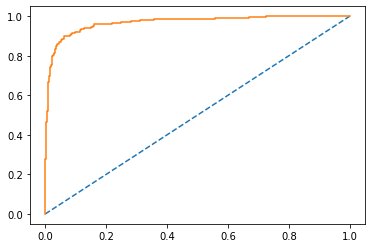

In [63]:
# predict probabilities
probs = selector.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
log_train_fpr, log_train_tpr, log_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr);

In [64]:
print(confusion_matrix(y_test, pred_test))

[[1024   17]
 [  46   97]]


In [65]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1041
         1.0       0.85      0.68      0.75       143

    accuracy                           0.95      1184
   macro avg       0.90      0.83      0.86      1184
weighted avg       0.94      0.95      0.94      1184



**We see about 0.63 and 0.68 recall score for both train and test.Also both have f1 score of about 0.75.**

**As the model has only 10% of the data as defaults, we will now try to balance the data before fiting the model.**

In [66]:
log_metrics=classification_report(y_test, pred_test,output_dict=True)
df=pd.DataFrame(log_metrics).transpose()
log_test_precision=round(df.loc["1.0"][1],2)
log_test_recall=round(df.loc["1.0"][2],2)
log_test_f1=round(df.loc["1.0"][0],2)
print ('log_test_precision ',log_test_precision)
print ('log_test_recall ',log_test_recall)
print ('log_test_f1 ',log_test_f1)

log_test_precision  0.68
log_test_recall  0.75
log_test_f1  0.85


In [67]:
# Accuracy - Test Data
log_test_acc = selector.score(X_test, y_test)
log_test_acc

0.9467905405405406

AUC: 0.974


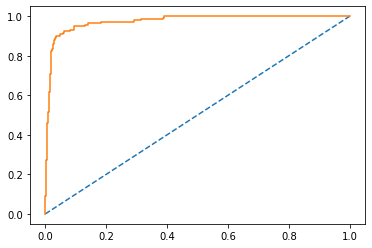

In [68]:
# predict probabilities
probs = selector.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
log_test_fpr, log_test_tpr, log_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr);

# 1.8 Build a Random Forest Model on Train Dataset. Also showcase your model building approach

## Ensemble RandomForest Classifier
### Building the Random Forest model


In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
#Build a RandomForestCassifier wit n_estimators 100, max_features 6, andfit it on the training data
rfcl=RandomForestClassifier(n_estimators=100,max_features=6,random_state=0,oob_score=True)

In [71]:
selector_2 = rfcl.fit(X_train, y_train)

In [72]:
pred_train_2 = selector_2.predict(X_train)
pred_test_2 = selector_2.predict(X_test)

# 1.9 Validate the Random Forest Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [73]:
print(confusion_matrix(y_train, pred_train_2))

[[2157    0]
 [   0  245]]


In [74]:
print(classification_report(y_train, pred_train_2))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2157
         1.0       1.00      1.00      1.00       245

    accuracy                           1.00      2402
   macro avg       1.00      1.00      1.00      2402
weighted avg       1.00      1.00      1.00      2402



In [75]:
rfcl_metrics=classification_report(y_train, pred_train_2,output_dict=True)
df=pd.DataFrame(rfcl_metrics).transpose()
rfcl_train_precision=round(df.loc["1.0"][1],2)
rfcl_train_recall=round(df.loc["1.0"][2],2)
rfcl_train_f1=round(df.loc["1.0"][0],2)
print ('rfcl_train_precision ',rfcl_train_precision)
print ('rfcl_train_recall ',rfcl_train_recall)
print ('rfcl_train_f1 ',rfcl_train_f1)

rfcl_train_precision  1.0
rfcl_train_recall  1.0
rfcl_train_f1  1.0


In [76]:
# Accuracy - Training Data
rfcl_train_acc = selector_2.score(X_train, y_train)
rfcl_train_acc

1.0

AUC: 1.000


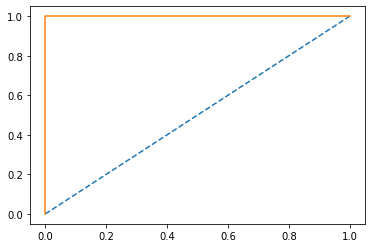

In [77]:
# predict probabilities
probs = selector_2.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rfcl_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rfcl_train_auc)
# calculate roc curve
rfcl_train_fpr, rfcl_train_tpr, rfcl_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcl_train_fpr, rfcl_train_tpr);

In [78]:
print(confusion_matrix(y_test, pred_test_2))

[[1040    1]
 [  11  132]]


In [79]:
print(classification_report(y_test, pred_test_2))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1041
         1.0       0.99      0.92      0.96       143

    accuracy                           0.99      1184
   macro avg       0.99      0.96      0.98      1184
weighted avg       0.99      0.99      0.99      1184



In [80]:
rfcl_metrics=classification_report(y_test, pred_test_2,output_dict=True)
df=pd.DataFrame(rfcl_metrics).transpose()
rfcl_test_precision=round(df.loc["1.0"][1],2)
rfcl_test_recall=round(df.loc["1.0"][2],2)
rfcl_test_f1=round(df.loc["1.0"][0],2)
print ('rfcl_test_precision ',rfcl_test_precision)
print ('rfcl_test_recall ',rfcl_test_recall)
print ('rfcl_test_f1 ',rfcl_test_f1)

rfcl_test_precision  0.92
rfcl_test_recall  0.96
rfcl_test_f1  0.99


In [81]:
# Accuracy - Test Data
rfcl_test_acc = selector_2.score(X_test, y_test)
rfcl_test_acc

0.9898648648648649

AUC: 0.998


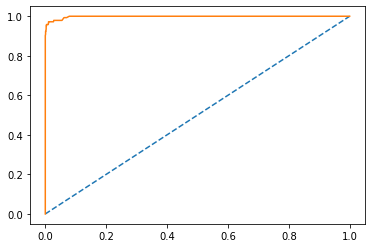

In [82]:
# predict probabilities
probs = selector_2.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rfcl_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rfcl_test_auc)
# calculate roc curve
rfcl_test_fpr, rfcl_test_tpr, rfcl_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcl_test_fpr, rfcl_test_tpr);

# 1.10 Build a LDA Model on Train Dataset. Also showcase your model building approach

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [133]:
#Build LDA Model
# Refer details for LDA at http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
clf = LinearDiscriminantAnalysis()
clf

LinearDiscriminantAnalysis()

In [134]:
selector_3 = clf.fit(X_train, y_train)
selector_3

LinearDiscriminantAnalysis()

In [86]:
pred_train_3 = selector_3.predict(X_train)
pred_test_3 = selector_3.predict(X_test)

# 1.11 Validate the LDA Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [87]:
print(confusion_matrix(y_train, pred_train_3))

[[2128   29]
 [ 121  124]]


In [88]:
print(classification_report(y_train, pred_train_3))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2157
         1.0       0.81      0.51      0.62       245

    accuracy                           0.94      2402
   macro avg       0.88      0.75      0.79      2402
weighted avg       0.93      0.94      0.93      2402



In [89]:
lda_metrics=classification_report(y_train, pred_train_3,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_precision=round(df.loc["1.0"][1],2)
lda_train_recall=round(df.loc["1.0"][2],2)
lda_train_f1=round(df.loc["1.0"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.51
lda_train_recall  0.62
lda_train_f1  0.81


In [90]:
# Accuracy - Training Data
lda_train_acc = selector_3.score(X_train, y_train)
lda_train_acc

0.9375520399666945

AUC: 0.956


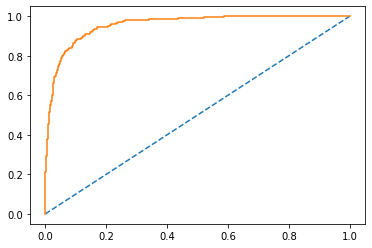

In [91]:
# predict probabilities
probs = selector_3.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr);

## Test Dataset:

In [92]:
print(confusion_matrix(y_test, pred_test_3))

[[1026   15]
 [  77   66]]


In [93]:
print(classification_report(y_test, pred_test_3))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1041
         1.0       0.81      0.46      0.59       143

    accuracy                           0.92      1184
   macro avg       0.87      0.72      0.77      1184
weighted avg       0.92      0.92      0.91      1184



In [94]:
lda_metrics=classification_report(y_test, pred_test_3,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_precision=round(df.loc["1.0"][1],2)
lda_test_recall=round(df.loc["1.0"][2],2)
lda_test_f1=round(df.loc["1.0"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.46
lda_test_recall  0.59
lda_test_f1  0.81


In [95]:
# Accuracy - Test Data
lda_test_acc = selector_3.score(X_test, y_test)
lda_test_acc

0.9222972972972973

AUC: 0.942


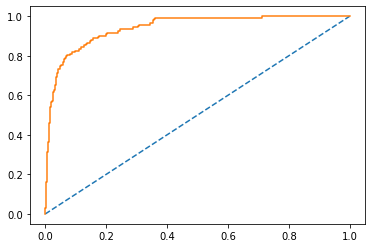

In [96]:
# predict probabilities
probs = selector_3.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr);

# 1.12 Compare the performances of Logistics, Radom Forest and LDA models (include ROC Curve)

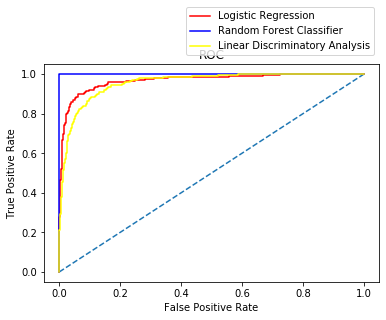

In [97]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_train_fpr, log_train_tpr,color='red',label="Logistic Regression")
plt.plot(rfcl_train_fpr,rfcl_train_tpr,color='blue',label="Random Forest Classifier")
plt.plot(lda_train_fpr,lda_train_tpr,color='yellow',label="Linear Discriminatory Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

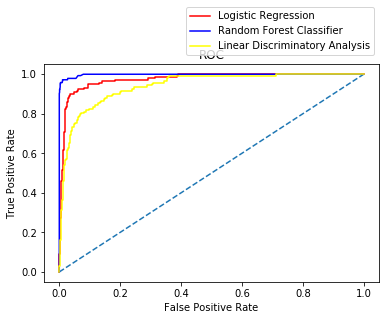

In [98]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_test_fpr, log_test_tpr,color='red',label="Logistic Regression")
plt.plot(rfcl_test_fpr,rfcl_test_tpr,color='blue',label="Random Forest Classifier")
plt.plot(lda_test_fpr,lda_test_tpr,color='yellow',label="Linear Discriminatory Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [99]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
dt = pd.DataFrame({'Logistic Regression Train':[log_train_acc,log_train_auc,log_train_recall,log_train_precision,log_train_f1],
        'Logistic Regression Test':[log_test_acc,log_test_auc,log_test_recall,log_test_precision,log_test_f1],
        'Random Forest Classifier Train':[rfcl_train_acc,rfcl_train_auc,rfcl_train_recall,rfcl_train_precision,rfcl_train_f1],
        'Random Forest Classifier Test':[rfcl_test_acc,rfcl_test_auc,rfcl_test_recall,rfcl_test_precision,rfcl_test_f1],
       'Linear Discriminent Analysis Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'Linear Discriminent Analysis Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
       },index=index)
round(dt,2)

,Logistic Regression Train,Logistic Regression Test,Random Forest Classifier Train,Random Forest Classifier Test,Linear Discriminent Analysis Train,Linear Discriminent Analysis Test
Accuracy,0.95,0.95,1.00,0.99,0.94,0.92
AUC,0.97,0.97,1.00,1.00,0.96,0.94
Recall,0.74,0.75,1.00,0.96,0.62,0.59
Precision,0.63,0.68,1.00,0.92,0.51,0.46
F1 Score,0.89,0.85,1.00,0.99,0.81,0.81


# 1.13 Recommendations from the above models


1. From this we can observe that, Logistic regression has slightly better performance than the Linear Discriminatory Analysis. As it has better recall, precision and F1 score.

2. Logistic regression also performs well in Test dataset comparision to Linear Discriminatory Analysis.

3. In terms of performance Random forest classifier performs way better then other two models.But the result of 100% accuracy and recall indicates the lack of equal number of defaults and non defaults in the dataset.

4. So it is required to do some hypertuning for the Random forest model.

5. As it is indicated that the dataset has only 10% of defaults.It is difficult to perform good modelling to extract a valid conclusion .

6. From the observation its concluded that Logistic Regression will be the better model in this business problem. As it performs reasonally well.

# Market Risk
## The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights.

In [100]:
!pip install tabulate
!pip install iexfinance
!pip install datetime

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
from scipy.stats import norm 
from tabulate import tabulate

from iexfinance.stocks import get_historical_data
from iexfinance.stocks import Stock
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [102]:
df=pd.read_csv('Market+Risk+Dataset.csv')

In [103]:
df.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [104]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian Hotel         314 non-null    int64 
 3   Mahindra & Mahindra  314 non-null    int64 
 4   Axis Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree Cement         314 non-null    int64 
 7   Sun Pharma           314 non-null    int64 
 8   Jindal Steel         314 non-null    int64 
 9   Idea Vodafone        314 non-null    int64 
 10  Jet Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [106]:
df.describe()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
count,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00
mean,511.34,114.56,636.68,540.74,59.10,14806.41,633.47,147.63,53.71,372.66
std,135.95,22.51,102.88,115.84,15.81,4288.28,171.86,65.88,31.25,202.26
min,234.00,64.00,284.00,263.00,21.00,5543.00,338.00,53.00,3.00,14.00
25%,424.00,96.00,572.00,470.50,47.00,10952.25,478.50,88.25,25.25,243.25
50%,466.50,115.00,625.00,528.00,57.00,16018.50,614.00,142.50,53.00,376.00
75%,630.75,134.00,678.00,605.25,71.75,17773.25,785.00,182.75,82.00,534.00
max,810.00,157.00,956.00,808.00,104.00,24806.00,1089.00,338.00,117.00,871.00


In [107]:
df.isnull().sum()

Date                   0
Infosys                0
Indian Hotel           0
Mahindra & Mahindra    0
Axis Bank              0
SAIL                   0
Shree Cement           0
Sun Pharma             0
Jindal Steel           0
Idea Vodafone          0
Jet Airways            0
dtype: int64

# 2.1 Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

In [108]:
## Lets us plot & see price trend over time for different companies

In [109]:
df['Dates'] = [pd.to_datetime(d) for d in df['Date']]

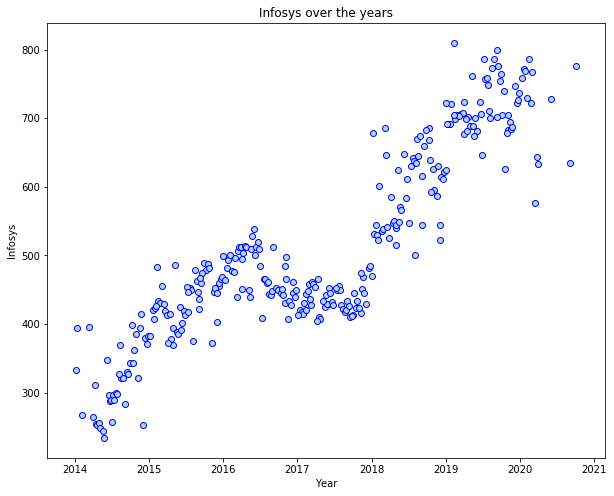

In [110]:
plt.figure(figsize = (10, 8))
plt.scatter(df['Dates'], df['Infosys'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')
plt.show()

**The stock prices of Infosys have been risen sharply over years especially from 2019 to 2021 which indicates the growth of the company as the companies worth have been increasing even amid the pandemic.**


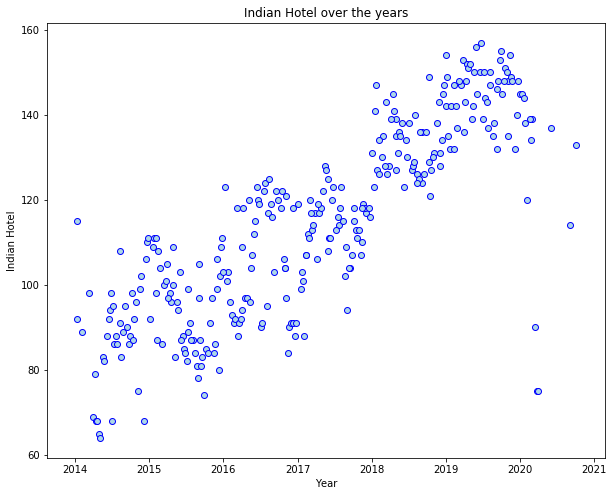

In [111]:
plt.figure(figsize = (10, 8))
plt.scatter(df['Dates'], df['Indian Hotel'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Indian Hotel')
plt.title('Indian Hotel over the years')
plt.show()

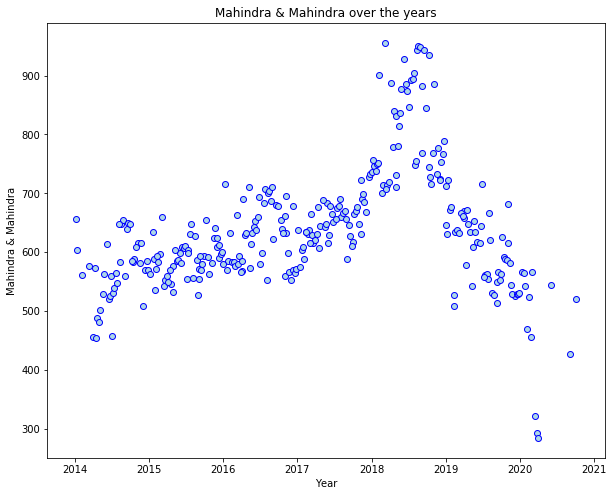

In [112]:
plt.figure(figsize = (10, 8))
plt.scatter(df['Dates'], df['Mahindra & Mahindra'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Mahindra & Mahindra')
plt.title('Mahindra & Mahindra over the years')
plt.show()

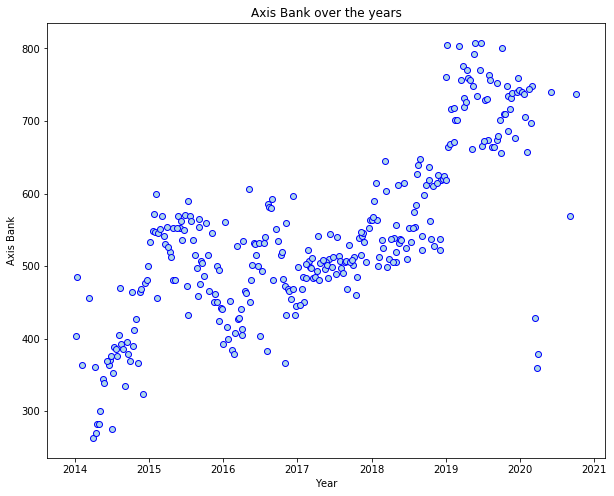

In [113]:
plt.figure(figsize = (10, 8))
plt.scatter(df['Dates'], df['Axis Bank'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Axis Bank')
plt.title('Axis Bank over the years')
plt.show()

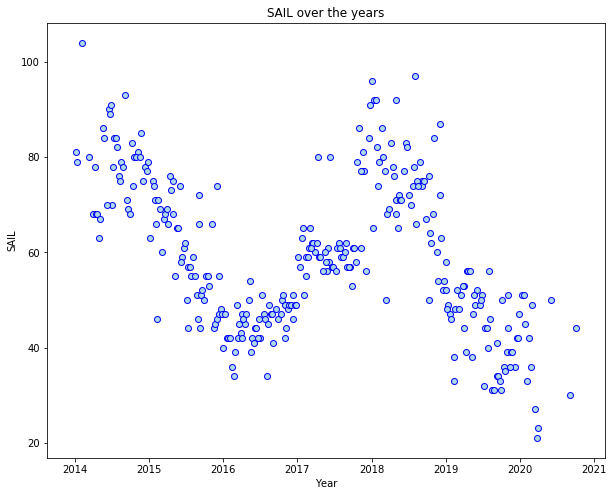

In [114]:
plt.figure(figsize = (10, 8))
plt.scatter(df['Dates'], df['SAIL'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('SAIL')
plt.title('SAIL over the years')
plt.show()

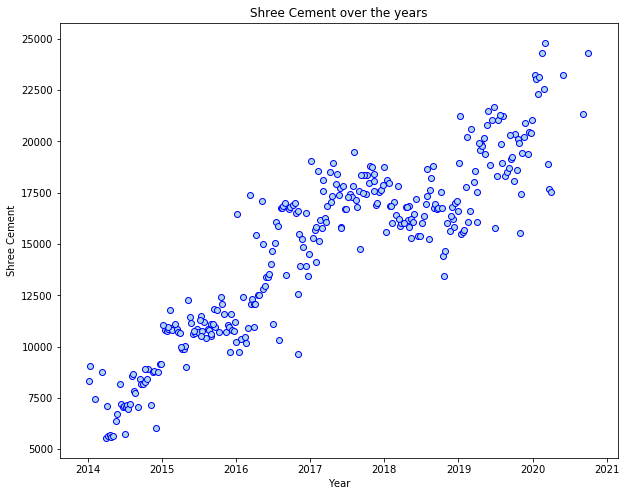

In [115]:
plt.figure(figsize = (10, 8))
plt.scatter(df['Dates'], df['Shree Cement'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Shree Cement')
plt.title('Shree Cement over the years')
plt.show()

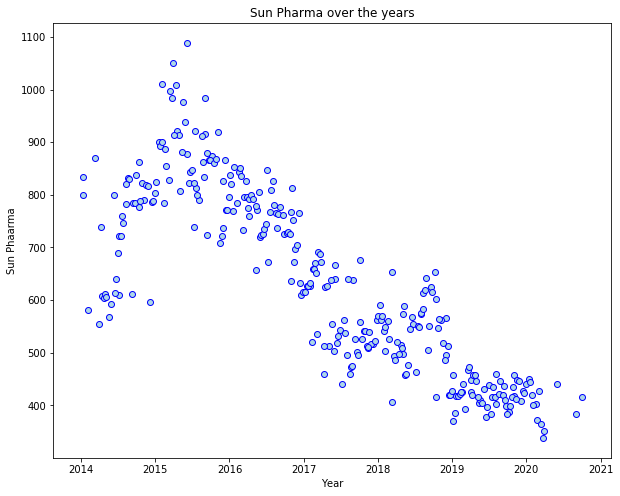

In [116]:
plt.figure(figsize = (10, 8))
plt.scatter(df['Dates'], df['Sun Pharma'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Sun Phaarma')
plt.title('Sun Pharma over the years')
plt.show()

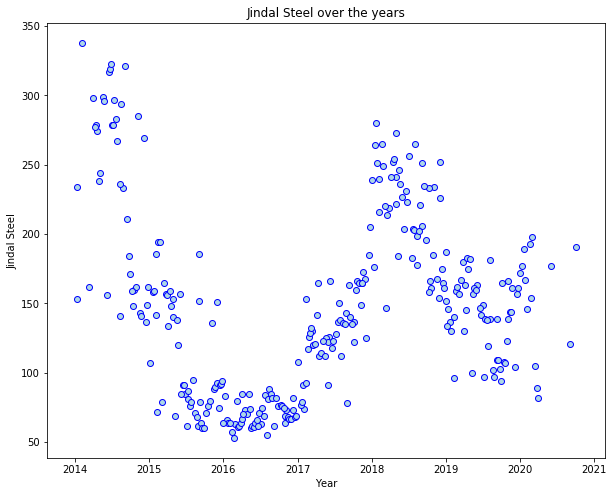

In [117]:
plt.figure(figsize = (10, 8))
plt.scatter(df['Dates'], df['Jindal Steel'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Jindal Steel')
plt.title('Jindal Steel over the years')
plt.show()

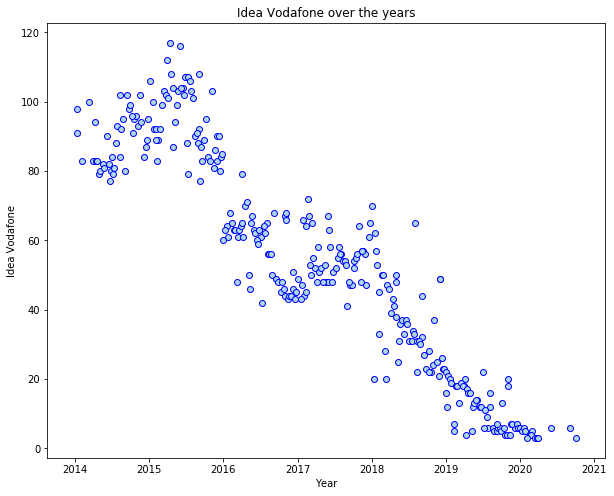

In [118]:
plt.figure(figsize = (10, 8))
plt.scatter(df['Dates'], df['Idea Vodafone'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Idea Vodafone')
plt.title('Idea Vodafone over the years')
plt.show()

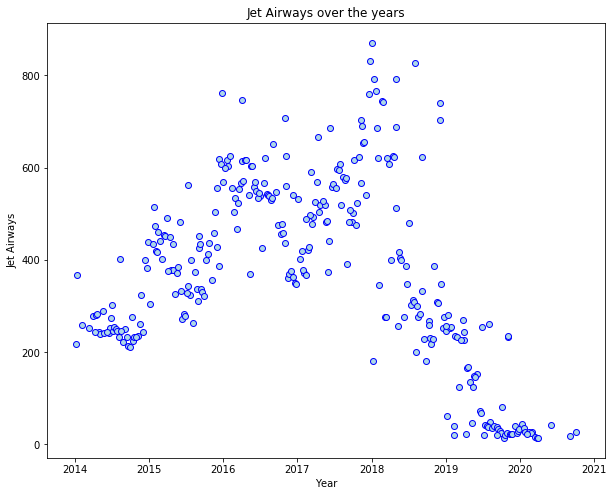

In [119]:
plt.figure(figsize = (10, 8))
plt.scatter(df['Dates'], df['Jet Airways'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Jet Airways')
plt.title('Jet Airways over the years')
plt.show()

**The stock prices of Jet Airways have been risen sharply over years especially till 2019 then had a sharp decline after 2019 which indicates the decrease in revenue loss during pandemic.**

# 2.2 Calculate Returns for all stocks with inference

## Steps for calculating returns from prices:

 **Take logarithms**
 
 
 **Take differences**



In [121]:
stock_returns = np.log(df.drop(['Date','Dates'],axis=1)).diff(axis = 0, periods = 1) 

In [122]:
stock_returns.shape

(314, 10)

In [123]:
stock_returns.head()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,-0.03,-0.01,0.01,0.05,0.03,0.03,0.09,-0.07,0.01,0.09
2,-0.01,0.00,-0.01,-0.02,-0.03,-0.01,-0.00,0.00,-0.01,-0.08
3,-0.00,0.00,0.07,0.05,0.00,0.01,-0.00,-0.02,0.00,0.01
4,0.01,-0.05,-0.01,-0.00,-0.08,-0.02,0.01,-0.14,-0.05,-0.15


**This gives the difference between the previous period stocks . This can give us the increase or decrease of the stock value from the previous period.**

# 2.3 Calculate Stock Means and Standard Deviation for all stocks with inference

## We now look at Means & Standard Deviations of these returns

   ### Stock Means: Average returns that the stock is making on a week to week basis
   ### Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock

### Calculating stock means


In [125]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                0.00
Indian Hotel           0.00
Mahindra & Mahindra   -0.00
Axis Bank              0.00
SAIL                  -0.00
Shree Cement           0.00
Sun Pharma            -0.00
Jindal Steel          -0.00
Idea Vodafone         -0.01
Jet Airways           -0.01
dtype: float64

### Calculating stock standard deviation

In [127]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys               0.04
Indian Hotel          0.05
Mahindra & Mahindra   0.04
Axis Bank             0.05
SAIL                  0.06
Shree Cement          0.04
Sun Pharma            0.05
Jindal Steel          0.08
Idea Vodafone         0.10
Jet Airways           0.10
dtype: float64

In [128]:
df1 = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df1

,Average,Volatility
Infosys,0.00,0.04
Indian Hotel,0.00,0.05
Mahindra & Mahindra,-0.00,0.04
Axis Bank,0.00,0.05
SAIL,-0.00,0.06
Shree Cement,0.00,0.04
Sun Pharma,-0.00,0.05
Jindal Steel,-0.00,0.08
Idea Vodafone,-0.01,0.10
Jet Airways,-0.01,0.10


**The average return and volatility gives the estimation of the return expected from the company also a percentage of the risk involved in investing in the company.**

# 2.4 Draw a plot of Stock Means vs Standard Deviation and state your inference

### Let us plot & see what they say about stock prices

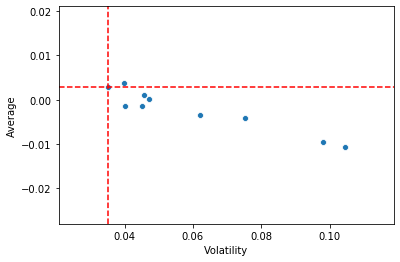

In [130]:
#plt.scatter(stock_sd, stock_means, edgecolors='r')
plot = sns.scatterplot(df1['Volatility'], df1['Average'])
plot.axvline(x=0.035070,linestyle='--', color = "red")
plot.axhline(y=0.002794,linestyle='--', color = "red")
plt.show()

# 2.5 Conclusion and Recommendations

1. Volatility of 0.4 indicates that both Infosys and Shree Cements are the 2 least risky investment.That is the chance of stock price ossilations are low.

2. Axis bank, Indian Hotel and Sun Pharma are the second least risky companies to invest.

3. Idea vodafone and Jet airways seems to be the highly risky investment.As the chance to stock price going low is very high.

4. Buying stocks of Infosys will give good returns & also buying stocks of Indian_Hotels/ Axis Bank /Shree cements  has  Good positive return eventhough there is volatility.

5. Avoid buying of Stocks of Idea Vodafone Jet AirwaysJindal steel.They showcase negative Average return with huge volatility.To safe the money avoid investments on these stocks.

6. Similarly Sun pharma/SAIL/Mahindra & Mahindra also has negative return with nominal risk compare to above said companies. But the returns are low.

7. We can also conclude that companies like Jindal steel and jet Airways had decline in 2020 and 2021 which can be attributed to the pandemic.